# import dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kddcup_dataset.csv to kddcup_dataset (4).csv


In [14]:
new_upload=files.upload()

Saving kddcup.data_10_percent_corrected to kddcup (1).data_10_percent_corrected


In [3]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.tree
import sklearn.naive_bayes
import sklearn.neighbors
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import io
df = pd.read_csv(io.BytesIO(uploaded['kddcup_dataset.csv']))
df.head()

,duration,"""protocol_type""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""","""logged_in""","""num_compromised""","""root_shell""","""su_attempted""","""num_root""","""num_file_creations""","""num_shells""","""num_access_files""","""num_outbound_cmds""","""is_host_login""",is_guest_login,"""count""","""srv_count""","""serror_rate""","""srv_serror_rate""","""rerror_rate""","""srv_rerror_rate""",same_srv_rate,"""diff_srv_rate""","""srv_diff_host_rate""","""dst_host_count""","""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate""",label
0,0,tcp,SF,223,185,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,1,0,0,71,255,1,0,1,1,0,0,0,0,normal
1,0,tcp,SF,230,260,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,19,0,0,0,0,1,0,11,3,255,1,0,33,7,33,0,0,0,normal
2,0,tcp,SF,297,13787,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,177,255,1,0,1,1,0,0,0,0,normal
3,0,tcp,SF,291,3542,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,12,0,0,0,0,1,0,0,187,255,1,0,1,1,0,0,0,0,normal
4,0,tcp,SF,295,753,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,22,0,0,0,0,1,0,9,196,255,1,0,1,1,0,0,0,0,normal


# EDA

In [4]:
df.shape

(41237, 41)

In [5]:
print("Labels in the data: \n")
print(set(df['label'].values))

Labels in the data: 

{'saint', 'apache2', 'back', 'normal', 'neptune', 'portsweep', 'phf'}


In [6]:
df.describe()

,duration,"""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""","""logged_in""","""num_compromised""","""root_shell""","""su_attempted""","""num_root""","""num_file_creations""","""num_shells""","""num_access_files""","""num_outbound_cmds""","""is_host_login""",is_guest_login,"""count""","""srv_count""","""serror_rate""","""srv_serror_rate""","""rerror_rate""","""srv_rerror_rate""",same_srv_rate,"""diff_srv_rate""","""srv_diff_host_rate""","""dst_host_count""","""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate"""
count,41237.000000,41237.000000,4.123700e+04,41237.0,41237.0,41237.0,41237.000000,41237.0,41237.000000,41237.000000,41237.000000,41237.0,41237.000000,41237.0,41237.0,41237.000000,41237.0,41237.0,41237.0,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000
mean,15.693552,2448.400078,4.681683e+03,0.0,0.0,0.0,0.053762,0.0,0.990227,0.025923,0.000437,0.0,0.000073,0.0,0.0,0.004220,0.0,0.0,0.0,10.343284,13.145428,0.192861,0.216602,0.687223,0.719451,1.049979,0.026699,6.542086,141.463443,246.231685,4.678881,0.169168,2.636516,1.882678,0.350292,0.283071,0.921309,0.797366
std,148.101460,11048.017170,2.774318e+04,0.0,0.0,0.0,0.323289,0.0,0.098374,0.165780,0.020888,0.0,0.008529,0.0,0.0,0.064821,0.0,0.0,0.0,13.373336,12.605359,2.744271,2.938093,7.548559,7.615237,1.605642,0.863426,12.301812,104.976288,35.095851,17.926474,2.305841,5.331950,2.186245,4.050813,3.613676,6.389255,5.699760
min,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,219.000000,5.960000e+02,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,31.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,260.000000,1.680000e+03,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,134.000000,255.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,311.000000,4.910000e+03,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,14.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,255.000000,255.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,2100.000000,107604.000000,5.203179e+06,0.0,0.0,0.0,7.000000,0.0,1.000000,7.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,300.000000,130.000000,88.000000,94.000000,98.000000,98.000000,95.000000,67.000000,83.000000,255.000000,255.000000,99.000000,99.000000,74.000000,67.000000,98.000000,87.000000,99.000000,89.000000


In [7]:
df.isnull().values.any()

False

Text(0.5, 1.0, 'Label Distribution')

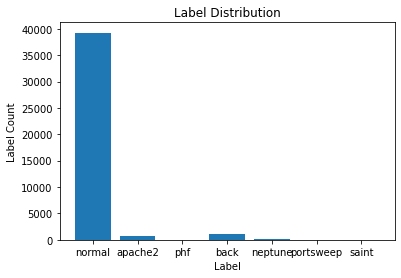

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
label_counts = Counter(df.label)
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Label Count')
plt.title('Label Distribution')

As expected, the normal traffic is much larger than the anomalous traffics

# Data Preprocessing

In [9]:
def label_anomalous(text):
    """Binarize target labels into normal or anomalous."""
    if text == "normal":
        return 0
    else:
        return 1

In [10]:
df["label"] = df["label"].apply(label_anomalous)

In [11]:
from sklearn.preprocessing import LabelEncoder

encodings_dictionary = dict()
for c in df.columns:
    if df[c].dtype == "object":
        encodings_dictionary[c] = LabelEncoder()
        df[c] = encodings_dictionary[c].fit_transform(df[c])

In [12]:
kdd_df_normal = df[df["label"] == 0]
kdd_df_abnormal = df[df["label"] == 1]

In [13]:
y_normal = kdd_df_normal.pop("label").values
X_normal = kdd_df_normal.values
y_anomaly = kdd_df_abnormal.pop("label").values
X_anomaly = kdd_df_abnormal.values

In [14]:
from sklearn.model_selection import train_test_split

X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(
    X_normal, y_normal, test_size=0.3, random_state=11
)

In [15]:
X_anomaly_train, X_anomaly_test, y_anomaly_train, y_anomaly_test = train_test_split(
    X_anomaly, y_anomaly, test_size=0.3, random_state=11
)

In [16]:
X_train = np.concatenate((X_normal_train, X_anomaly_train))
y_train = np.concatenate((y_normal_train, y_anomaly_train))
X_test = np.concatenate((X_normal_test, X_anomaly_test))
y_test = np.concatenate((y_normal_test, y_anomaly_test))

In [50]:
# k-Nearest Neighbors model
knc = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train,y_train)
knc_prediction = knc.predict(X_test)
knc_accuracy = 100.0 * accuracy_score(y_test, knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))
print(confusion_matrix(y_test, knc_prediction)) 
print(classification_report(y_test, knc_prediction, digits=4)) 

K-Nearest Neighbours accuracy: 99.90300678952472
[[11773     2]
 [   10   587]]
              precision    recall  f1-score   support

           0     0.9992    0.9998    0.9995     11775
           1     0.9966    0.9832    0.9899       597

    accuracy                         0.9990     12372
   macro avg     0.9979    0.9915    0.9947     12372
weighted avg     0.9990    0.9990    0.9990     12372



In [51]:
# Decision tree model
dtc = sklearn.tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
dtc_prediction = dtc.predict(X_test)
dtc_accuracy = 100.0 * accuracy_score(y_test, knc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))
print(confusion_matrix(y_test, knc_prediction)) 
print(classification_report(y_test, knc_prediction, digits=4)) 

Decision Tree accuracy: 99.90300678952472
[[11773     2]
 [   10   587]]
              precision    recall  f1-score   support

           0     0.9992    0.9998    0.9995     11775
           1     0.9966    0.9832    0.9899       597

    accuracy                         0.9990     12372
   macro avg     0.9979    0.9915    0.9947     12372
weighted avg     0.9990    0.9990    0.9990     12372



In [53]:
#Linear SVM
import sklearn.svm
lsvm=sklearn.svm.LinearSVC(max_iter=40000)
lsvm.fit(X_train,y_train)
lsvm_prediction = lsvm.predict(X_test)
lsvm_accuracy = 100.0 * accuracy_score(y_test, lsvm_prediction)
print ("Linear SVM accuracy: " + str(lsvm_accuracy))
print(confusion_matrix(y_test, lsvm_prediction)) 
print(classification_report(y_test, lsvm_prediction, digits=4)) 

Linear SVM accuracy: 99.8625929518267
[[11770     5]
 [   12   585]]
              precision    recall  f1-score   support

           0     0.9990    0.9996    0.9993     11775
           1     0.9915    0.9799    0.9857       597

    accuracy                         0.9986     12372
   macro avg     0.9953    0.9897    0.9925     12372
weighted avg     0.9986    0.9986    0.9986     12372



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [32]:
#ANN
import tensorflow as tf
mlp = tf.keras.Sequential()
mlp.add(tf.keras.layers.Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
#mlp.add(tf.keras.layers.Dense(units=30, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])

mlp.fit(X_train, y_train, epochs=10)

Epoch 1/10
903/903 [==============================] - 3s 3ms/step - loss: 8.2890 - accuracy: 0.9940
Epoch 2/10
903/903 [==============================] - 2s 3ms/step - loss: 0.3601 - accuracy: 0.9989
Epoch 3/10
903/903 [==============================] - 3s 3ms/step - loss: 0.4480 - accuracy: 0.9992
Epoch 4/10
903/903 [==============================] - 1s 2ms/step - loss: 0.2447 - accuracy: 0.9992
Epoch 5/10
903/903 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9994
Epoch 6/10
903/903 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 0.9998
Epoch 7/10
903/903 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.9997
Epoch 8/10
903/903 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.9993
Epoch 9/10
903/903 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9993
Epoch 10/10
387/387 [==============================] - 1s 1ms/step - loss: 0.8945 - accuracy: 0.9993

In [48]:
mlp_prediction = mlp.predict(X_test)
mlp_prediction = mlp_prediction.astype(int)
mlp_accuracy = 100.0 * accuracy_score(y_test, mlp_prediction)
print ("ANN accuracy: " + str(mlp_accuracy))
print(confusion_matrix(y_test, mlp_prediction)) 
print(classification_report(y_test, mlp_prediction, digits=4)) 

ANN accuracy: 99.90300678952472
[[11771     4]
 [    8   589]]
              precision    recall  f1-score   support

           0     0.9993    0.9997    0.9995     11775
           1     0.9933    0.9866    0.9899       597

    accuracy                         0.9990     12372
   macro avg     0.9963    0.9931    0.9947     12372
weighted avg     0.9990    0.9990    0.9990     12372

